#  Drug Property Prediction Framework

In [164]:
from DeepPurpose import utils, dataset, CompoundPred
import warnings
warnings.filterwarnings("ignore")

In [165]:
import pandas as pd

Here, we test on FreeSol dataset. 

In [169]:
freesol = pd.read_csv('../databases/EXP_database/solvationEnergy/OriginalDatasets/freesol_processed.csv', names=['SMILES', 'target'])

In [170]:
len(freesol)

640

In [171]:
X_drugs = freesol['SMILES']
y = freesol['target']

In [172]:
len(X_drugs), len(set(X_drugs))

(640, 640)

Thre are 640 compounds in total.

In [173]:
drug_encoding = 'MPNN'

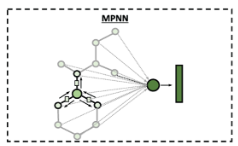

In [174]:
train_set, valid_set, test_set = utils.data_process(X_drug = X_drugs, y = y, drug_encoding = drug_encoding,
                                split_method='random', frac=[0.7,0.1,0.2],
                                random_seed = 1)
#train.head(1)

Drug Property Prediction Mode...
in total: 640 drugs
encoding drug...
unique drugs: 640
Done.


In [175]:
len(train_set), len(valid_set), len(test_set)

(448, 64, 128)

In [177]:
#plt.figure(figsize=(5, 5))
#ax1 = plt.subplot(221)
#sns.displot(train_set['Label'])
#sns.displot(valid_set['Label'])
#sns.displot(test_set['Label'])

In [180]:
#train_set.columns

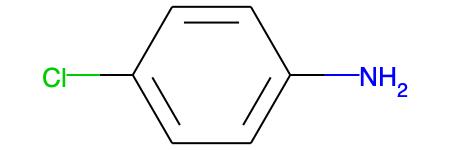

In [199]:
mol = Chem.MolFromSmiles(train_set['SMILES'][1])
mol

In [200]:
mol.GetNumAtoms(), mol.GetNumBonds()

(8, 8)

Initial feature vectors for atoms and bonds
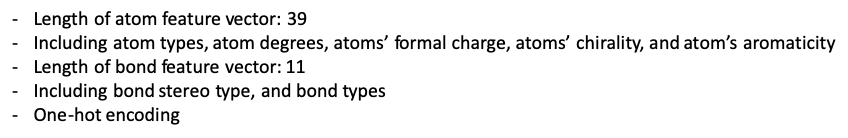

In [195]:
train_set['drug_encoding'][0][0].shape # atom features 

torch.Size([200, 39])

Note, they pad each single molecule to make the first dimension (atom #) expand to 200. 

In [184]:
train_set['drug_encoding'][0][1].shape # atom+bond features

torch.Size([400, 50])

They also pad the first dimention (bodn #) to 400. 

In [185]:
train_set['drug_encoding'][0][2].shape # atom graph 

torch.Size([200, 6])

In [186]:
train_set['drug_encoding'][0][3].shape # bond graph

torch.Size([400, 6])

In [198]:
train_set['drug_encoding'][1][4].shape, # number of atoms and bonds
train_set['drug_encoding'][1][4]

tensor([[ 8., 17.]])

In [212]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [256,256,128],  # read-out linear layer dimension
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 32,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3 # aotm embedding updating times
                        )


In [213]:
model = CompoundPred.model_initialize(**config)

In [214]:
model.model

Classifier(
  (model_drug): MPNN(
    (W_i): Linear(in_features=50, out_features=128, bias=False)
    (W_h): Linear(in_features=128, out_features=128, bias=False)
    (W_o): Linear(in_features=167, out_features=128, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=1, bias=True)
  )
)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 34.6432. Total time 0.0 hours
Validation at Epoch 1 , MSE: 15.3708 , Pearson Correlation: -0.0873 with p-value: 0.49265 , Concordance Index: 0.48087
Training at Epoch 2 iteration 0 with loss 41.9759. Total time 0.0 hours
Validation at Epoch 2 , MSE: 11.2123 , Pearson Correlation: 0.25638 with p-value: 0.04085 , Concordance Index: 0.58420
Training at Epoch 3 iteration 0 with loss 15.6994. Total time 0.00027 hours
Validation at Epoch 3 , MSE: 11.5288 , Pearson Correlation: 0.19215 with p-value: 0.12822 , Concordance Index: 0.55439
Training at Epoch 4 iteration 0 with loss 12.8351. Total time 0.00055 hours
Validation at Epoch 4 , MSE: 13.0291 , Pearson Correlation: -0.0489 with p-value: 0.70108 , Concordance Index: 0.48186
Training at Epoch 5 iteration 0 with loss 9.14713. Total time 0.00083 hours
Validation at Epoch 5 , MSE: 12.4066 , Pearson Correlation: 0.12406 with p-value: 0.32

Validation at Epoch 43 , MSE: 2.49246 , Pearson Correlation: 0.89170 with p-value: 5.09439 , Concordance Index: 0.85096
Training at Epoch 44 iteration 0 with loss 1.87052. Total time 0.00916 hours
Validation at Epoch 44 , MSE: 2.98201 , Pearson Correlation: 0.88823 with p-value: 1.28345 , Concordance Index: 0.84749
Training at Epoch 45 iteration 0 with loss 4.06605. Total time 0.00944 hours
Validation at Epoch 45 , MSE: 3.08305 , Pearson Correlation: 0.89817 with p-value: 8.32731 , Concordance Index: 0.85295
Training at Epoch 46 iteration 0 with loss 1.43140. Total time 0.00972 hours
Validation at Epoch 46 , MSE: 2.64919 , Pearson Correlation: 0.89916 with p-value: 6.25968 , Concordance Index: 0.85792
Training at Epoch 47 iteration 0 with loss 1.18915. Total time 0.00972 hours
Validation at Epoch 47 , MSE: 2.35713 , Pearson Correlation: 0.89848 with p-value: 7.62444 , Concordance Index: 0.85742
Training at Epoch 48 iteration 0 with loss 4.09100. Total time 0.01 hours
Validation at Epoc

Validation at Epoch 85 , MSE: 1.79325 , Pearson Correlation: 0.92943 with p-value: 1.54792 , Concordance Index: 0.89369
Training at Epoch 86 iteration 0 with loss 1.78747. Total time 0.01722 hours
Validation at Epoch 86 , MSE: 2.04978 , Pearson Correlation: 0.92874 with p-value: 2.06785 , Concordance Index: 0.89220
Training at Epoch 87 iteration 0 with loss 1.73266. Total time 0.01722 hours
Validation at Epoch 87 , MSE: 1.71781 , Pearson Correlation: 0.92936 with p-value: 1.59317 , Concordance Index: 0.88772
Training at Epoch 88 iteration 0 with loss 1.43026. Total time 0.0175 hours
Validation at Epoch 88 , MSE: 1.86063 , Pearson Correlation: 0.92971 with p-value: 1.37562 , Concordance Index: 0.88922
Training at Epoch 89 iteration 0 with loss 1.26923. Total time 0.01777 hours
Validation at Epoch 89 , MSE: 1.91748 , Pearson Correlation: 0.92978 with p-value: 1.33350 , Concordance Index: 0.88474
Training at Epoch 90 iteration 0 with loss 1.59088. Total time 0.01777 hours
Validation at Ep

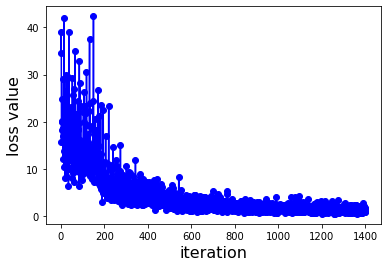

In [215]:
model.train(train_set, valid_set, test_set)

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
X_drug_test = X_drugs[1500:1510]
y_test = y[1500:1510]
X_pred = utils.data_process(X_drug = X_drug_test, y = y_test, drug_encoding = drug_encoding, split_method='no_split')
y_pred = model.predict(X_pred)
#print('The predicted score is ' + str(y_pred))

print(y_pred)

Drug Property Prediction Mode...
in total: 10 drugs
encoding drug...
unique drugs: 10
do not do train/test split on the data for already splitted data
predicting...


In [30]:
y_test

array([-5.6788342 , -5.74518569, -5.95042814, -5.72495873, -5.90030157,
       -5.44347109, -5.7082883 , -5.51402815, -5.71168662, -5.45077702])

In [31]:
print(y_pred)

[-3.172713279724121, -3.484865665435791, -3.780646324157715, -4.011632442474365, -3.8771567344665527, -4.020847797393799, -3.9084877967834473, -4.1511311531066895, -4.006253719329834, -3.9111499786376953]
